We have done importing csv files into pandas for data analysis, pandas allows us to import various file format other than csv file

This time we will import excel file using pandas and then perform exploratory data analysis, the data we will import is avaliable from 

Pandas can read different file formats, this time we will read excel file

The dataset is https://www.kaggle.com/roshansharma/immigration-to-canada-ibm-dataset

Checking the file we can see the data header starts from line 20

#### Read data from excel file (Canada.xlsx"), read only the sheet of "Canada by Citizenship", print the shape of the data and display the first 5 rows

In [2]:
import pandas as pd
df = pd.read_excel('Canada.xlsx', sheet_name='Canada by Citizenship', skiprows=20)
print(df.shape)
df.head()

(197, 43)


,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


#### Rename the column of OdName to Country

In [3]:
df.rename(columns={'OdName': "Country"}, inplace=True)
df.head()

,Type,Coverage,Country,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


#### Add a column contains the total number of immigrants

In [4]:
df['Total'] = df[range(1980, 2014)].sum(axis=1)
df.head()

,Type,Coverage,Country,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1223,856,702,560,716,561,539,620,603,15699
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,1,0,0,0,0,0,0,0,6
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,1,1,0,0,0,0,1,1,15


#### Drop the columns of Type, Coverage, AREA, AREAName, REG, DEV, DevName
#### Rename AreaName to Area, and RegName to Region

In [5]:
df.drop(columns=['Type', 'Coverage', 'AREA', 'REG', 'DEV', 'DevName'], inplace=True)
df.rename(columns={'AreaName': "Area", 'RegName': 'Region'}, inplace=True)
df.head()

,Country,Area,Region,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


#### Set the country as index to allow us to retrieve data based on country easily

In [6]:
df.set_index('Country', inplace=True)
df.head(2)

,Area,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,741,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,1,0,0,0,0,0,1,2,...,1223,856,702,560,716,561,539,620,603,15699


#### Retrieve the row for country of Haiti

In [7]:
df.loc[['Haiti']]

,Area,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Haiti,Latin America and the Caribbean,Caribbean,1666,3692,3498,2860,1418,1321,1753,2132,...,1682,1619,1598,2491,2080,4744,6503,5868,4152,84813


#### Plot the a line plot for Haiti number of immigrants from 1980 to 2013

In [8]:
from matplotlib import pyplot as plt
%matplotlib inline

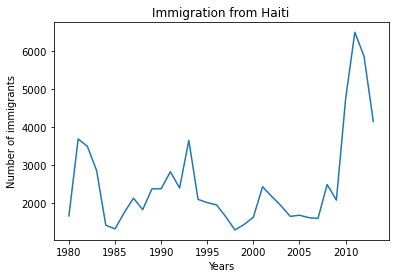

In [9]:
df.loc['Haiti', range(1980, 2014)].plot()
plt.title('Immigration from Haiti')
plt.xlabel('Years')
plt.ylabel('Number of immigrants');

=====================================================================================
#### During numpy excise we have computed statistics across different dimentions, now let's do the same using pandas:

Suppose we have 4 students taking 3 courses and below shows the grade for each course, students, and semester

dimensions: (semester, student, course)
```
semester1 = [
    [3,4,4],
    [2,3,3],
    [2,2,3],
    [1,2,3]
]
semester2 = [
    [3,3,4],
    [3,3,4],
    [3,3,3],
    [2,3,3]
]
```
calculate average student grade: 
- total average across all students and course and semester
- group by student and course
- group by course
- group by student
- group by student and semester
- group by semester
- group by course and semester

#### Build pandas DataFrame from numpy array

In [10]:
import numpy as np
semester1 = np.array([
    [3,4,4],
    [2,3,3],
    [2,2,3],
    [1,2,3]
])
semester2 = np.array([
    [3,3,4],
    [3,3,4],
    [3,3,3],
    [2,3,3]
])
df = pd.DataFrame(semester1, columns=['math', 'english', 'science'])
df.index.set_names('student', inplace=True)
df['semester'] = 1
df
df2 = pd.DataFrame(semester2, columns=['math', 'english', 'science'])
df2.index.set_names('student', inplace=True)
df2['semester'] = 2
all = pd.concat([df, df2]).reset_index().set_index(['semester', 'student'])
all

math  english  science
semester student                        
1        0           3        4        4
         1           2        3        3
         2           2        2        3
         3           1        2        3
2        0           3        3        4
         1           3        3        4
         2           3        3        3
         3           2        3        3

#### 1. Total average across all students and course and semester

In [11]:
all.mean().mean()

2.875

#### 2. Group by student and course

In [12]:
all.groupby('student').mean()

,math,english,science
student,,,
0,3.0,3.5,4.0
1,2.5,3.0,3.5
2,2.5,2.5,3.0
3,1.5,2.5,3.0


#### 3. Group by course

In [13]:
all.mean()

math       2.375
english    2.875
science    3.375
dtype: float64

#### 4. Group by student

In [14]:
all.groupby('student').mean().mean(axis=1)

student
0    3.500000
1    3.000000
2    2.666667
3    2.333333
dtype: float64

#### 5. Group by student and semester

In [15]:
all.mean(axis=1)

semester  student
1         0          3.666667
          1          2.666667
          2          2.333333
          3          2.000000
2         0          3.333333
          1          3.333333
          2          3.000000
          3          2.666667
dtype: float64

#### 6. Group by semester

In [16]:
all.groupby('semester').mean().mean(axis=1)

semester
1    2.666667
2    3.083333
dtype: float64

#### 7. Group by course and semester

In [17]:
all.groupby('semester').mean()

,math,english,science
semester,,,
1,2.00,2.75,3.25
2,2.75,3.00,3.50


=============================================
#### Plot the average grades for students in each semester, with x = student and y = average grades, plot bars for each semesters next to each other like 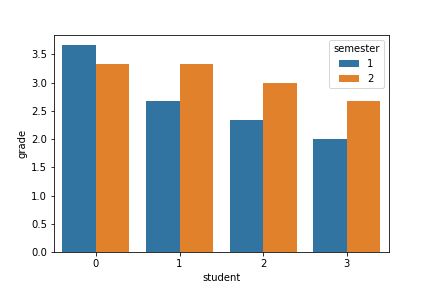

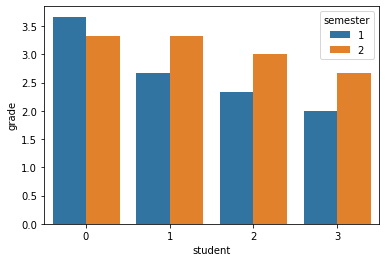

In [18]:
import seaborn as sns
data = pd.DataFrame(all.mean(axis=1))
data.reset_index(inplace=True)
data.rename(columns={0: "grade"}, inplace=True)
sns.barplot(x='student', y='grade', hue='semester', data = data);
plt.savefig('students_grade.png')